In [1]:
#import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#create list of needed variables
vars_list=['Age','n_dependants','fam_status','income','max_order','order_frequency','region_flag','time_order_placed','loyalty_flag']

In [3]:
path=r'C:\Users\jadep\Documents\Career Foundry\Achievement 4\04-2020Instacart Basket Analysis'

In [4]:
df_ana = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'all_data_merged.csv'), usecols = vars_list)

In [5]:
#create age ranges
df_ana.loc[df_ana['Age']<31,'age_group']='young_adult'
df_ana.loc[(df_ana['Age']<=55) & (df_ana['Age']>=31),'age_group']='middle_age_adult'
df_ana.loc[df_ana['Age']>55,'age_group']='older_adult'

In [6]:
#compare average max order to age
df_ana.groupby('Age')['max_order'].mean()

Age
18    33.042234
19    33.396135
20    32.121152
21    34.360186
22    34.473044
        ...    
77    32.750703
78    32.064872
79    33.440994
80    33.583595
81    33.491969
Name: max_order, Length: 64, dtype: float64

In [7]:
df_ana['avg_max_order']=df_ana.groupby('Age')['max_order'].mean()

In [8]:
#create random groupings for memory conservation
np.random.seed(4)
dev = np.random.rand(len(df_ana)) <= 0.7

In [9]:
big = df_ana[dev]

In [10]:
small =df_ana[~dev]

In [11]:
small.groupby('age_group')['max_order'].mean()

age_group
middle_age_adult    33.118098
older_adult         33.070419
young_adult         32.851398
Name: max_order, dtype: float64

In [12]:
df_2=small.groupby('age_group')['max_order'].mean()

In [13]:
df_2=df_2[['young_adult','middle_age_adult','older_adult']]

<AxesSubplot:xlabel='age_group'>

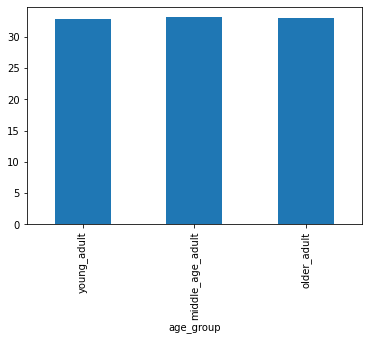

In [14]:
df_2.plot.bar()

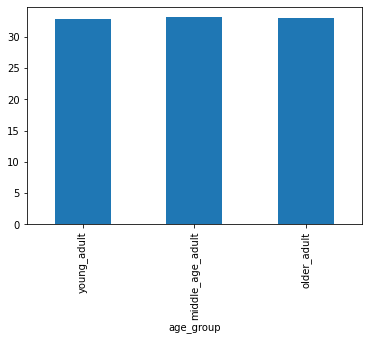

In [15]:
bar =df_2.plot.bar()

In [16]:
bar.figure.savefig(os.path.join(path,'Analysis','Visualizations','bar_age_max_orders.png'))

In [17]:
#compare age range and income

In [18]:
small.groupby('age_group')['income'].mean()

age_group
middle_age_adult     97742.990629
older_adult         115694.412709
young_adult          70436.583261
Name: income, dtype: float64

In [19]:
df_3=small.groupby('age_group')['income'].mean()

In [20]:
df_3=df_3[['young_adult','middle_age_adult','older_adult']]

<AxesSubplot:xlabel='age_group'>

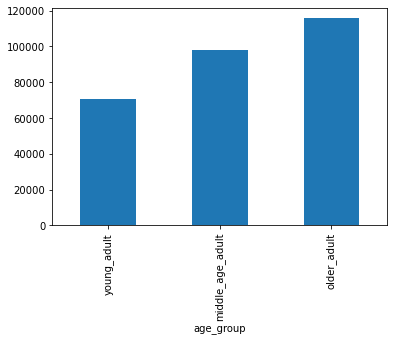

In [21]:
df_3.plot.bar()


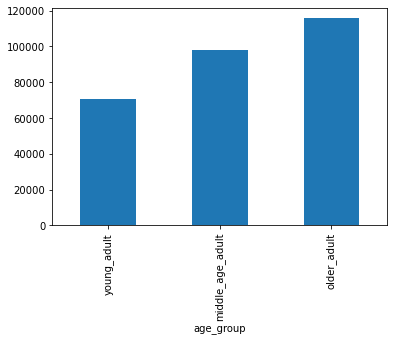

In [22]:
bar=df_3.plot.bar()

In [23]:
bar.figure.savefig(os.path.join(path,'Analysis','Visualizations','age_income.png'))

In [24]:
#compare age range and average number of dependants

In [25]:
small.groupby('age_group')['n_dependants'].mean()

age_group
middle_age_adult    1.501296
older_adult         1.500594
young_adult         1.502927
Name: n_dependants, dtype: float64

In [26]:
#determining family status distribution among Instacart users
small['fam_status'].value_counts()

married                             6825446
single                              1598455
divorced/widowed                     832036
living with parents and siblings     465161
Name: fam_status, dtype: int64

<AxesSubplot:>

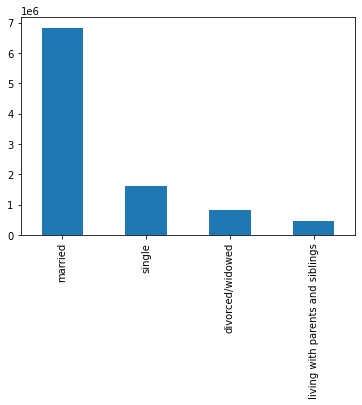

In [27]:
small['fam_status'].value_counts().plot.bar()

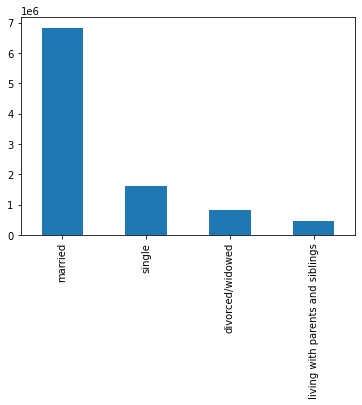

In [28]:
bar=small['fam_status'].value_counts().plot.bar()

In [29]:
bar.figure.savefig(os.path.join(path,'Analysis','Visualizations','fam_status_count.png'))

In [30]:
#average age among family status groupings
small.groupby('fam_status')['Age'].mean()

fam_status
divorced/widowed                    70.514295
living with parents and siblings    19.502405
married                             51.489847
single                              38.584686
Name: Age, dtype: float64

In [31]:
#average income by family status
small.groupby('fam_status')['income'].mean()

fam_status
divorced/widowed                    115685.490991
living with parents and siblings     70681.151857
married                             101305.847279
single                               91331.112474
Name: income, dtype: float64

In [32]:
df_4=small.groupby('fam_status')['income'].mean()

<AxesSubplot:xlabel='fam_status'>

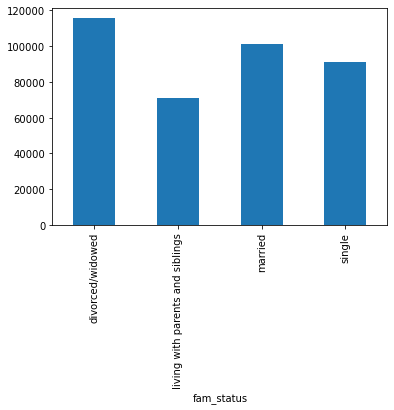

In [33]:
df_4.plot.bar()

In [34]:
#average max number of orders by family status
small.groupby('fam_status')['max_order'].mean()

fam_status
divorced/widowed                    33.258978
living with parents and siblings    33.442842
married                             32.931052
single                              33.301380
Name: max_order, dtype: float64

age, family status, income, number of dependants do not seem to make a difference in terms of order

In [35]:
#average number of orders by family status
small.groupby('fam_status')['order_frequency'].mean()

fam_status
divorced/widowed                    11.565980
living with parents and siblings    11.544774
married                             11.574412
single                              11.559353
Name: order_frequency, dtype: float64

In [36]:
#average number of orders by age
small.groupby('age_group')['order_frequency'].mean()

age_group
middle_age_adult    11.556141
older_adult         11.585291
young_adult         11.565575
Name: order_frequency, dtype: float64

<AxesSubplot:xlabel='age_group,loyalty_flag'>

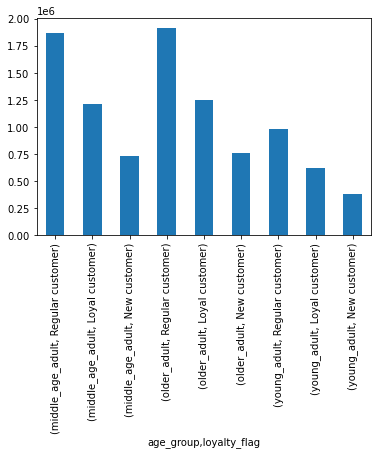

In [37]:
#greatest number of Instacart users by age and loyalty status 
small.groupby('age_group')['loyalty_flag'].value_counts().plot.bar()

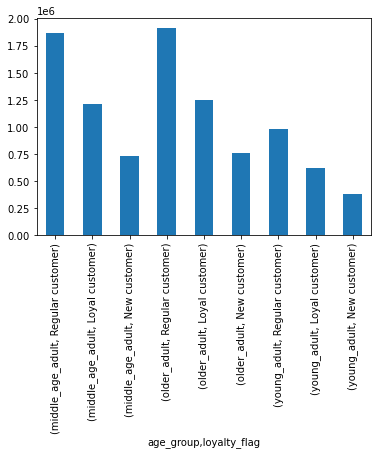

In [38]:
bar=small.groupby('age_group')['loyalty_flag'].value_counts().plot.bar()

In [39]:
bar.figure.savefig(os.path.join(path,'Analysis','Visualizations','age_loyaly_counts.png'))

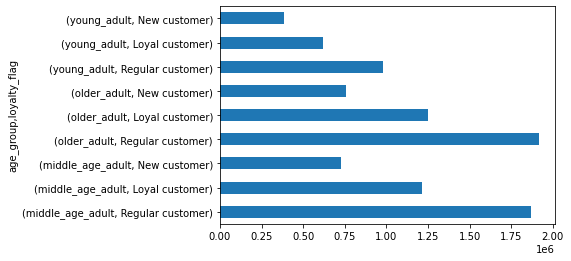

In [55]:
bar=small.groupby('age_group')['loyalty_flag'].value_counts().plot.barh()

In [56]:
bar.figure.savefig(os.path.join(path,'Analysis','Visualizations','age_loyalty.png'))

<AxesSubplot:>

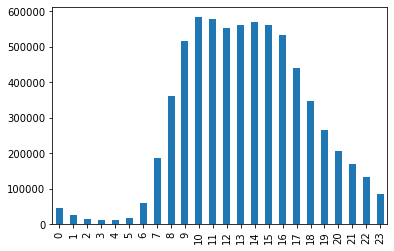

In [40]:
#greatest orders placed by hour by married people
small.loc[small['fam_status']=='married']['time_order_placed'].value_counts().sort_index().plot.bar()

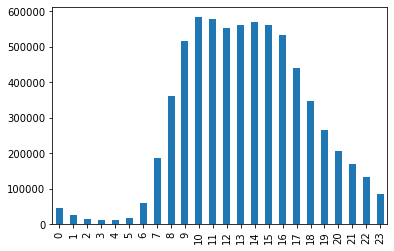

In [41]:
bar=small.loc[small['fam_status']=='married']['time_order_placed'].value_counts().sort_index().plot.bar()

In [42]:
bar.figure.savefig(os.path.join(path,'Analysis','Visualizations','married_time_order.png'))

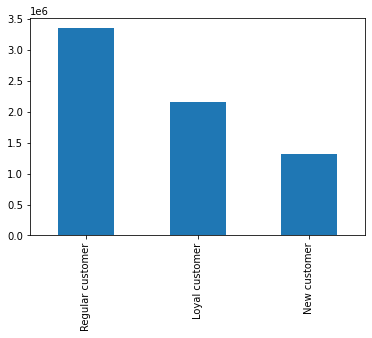

In [43]:
#loyalty by married customers
bar=small.loc[small['fam_status']=='married']['loyalty_flag'].value_counts().plot.bar()

In [44]:
bar.figure.savefig(os.path.join(path,'Analysis','Visualizations','married_loyalty.png'))

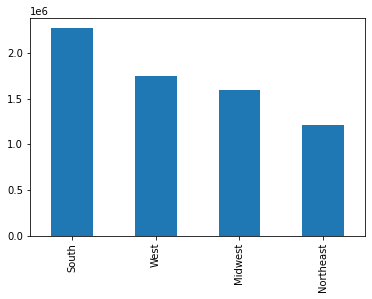

In [45]:
#greatest number of married instacart users by region
bar=small.loc[small['fam_status']=='married']['region_flag'].value_counts().plot.bar()

In [46]:
bar.figure.savefig(os.path.join(path,'Analysis','Visualizations','married_regions.png'))

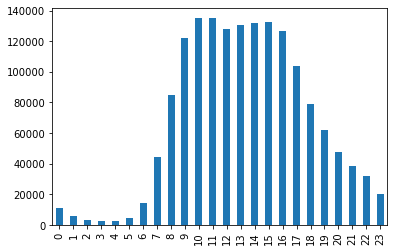

In [47]:
bar=small.loc[small['fam_status']=='single']['time_order_placed'].value_counts().sort_index().plot.bar()

In [48]:
bar.figure.savefig(os.path.join(path,'Analysis','Visualizations''single_time_order.png'))

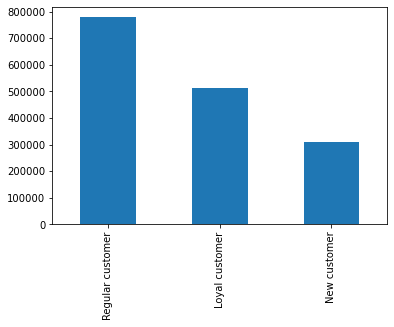

In [49]:
bar=small.loc[small['fam_status']=='single']['loyalty_flag'].value_counts().plot.bar()

In [50]:
bar.figure.savefig(os.path.join(path,'Analysis','Visualizations','single_loyalty.png'))

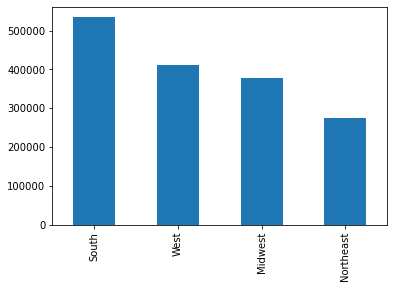

In [51]:
bar=small.loc[small['fam_status']=='single']['region_flag'].value_counts().plot.bar()

In [52]:
bar.figure.savefig(os.path.join(path,'Analysis','Visualizations','single_region.png'))

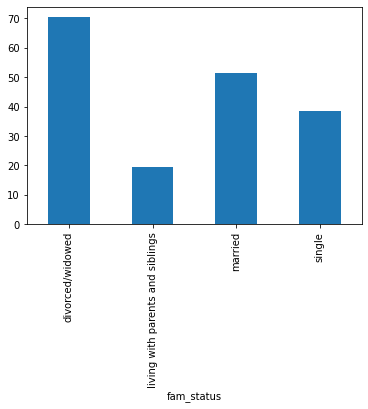

In [53]:
bar=small.groupby('fam_status')['Age'].mean().plot.bar()